<a href="https://colab.research.google.com/github/Ayanlola2002/Stutern/blob/master/Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
!pip install pydataset --disable-pip-version-check -q  # install a Python package containing the dataset
import pydataset
from pydataset import data
df = data('mtcars')
data('mtcars', show_doc=True)

mtcars

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Motor Trend Car Road Tests

### Description

The data was extracted from the 1974 _Motor Trend_ US magazine, and comprises
fuel consumption and 10 aspects of automobile design and performance for 32
automobiles (1973–74 models).

### Usage

    mtcars

### Format

A data frame with 32 observations on 11 variables.

[, 1]

mpg

Miles/(US) gallon

[, 2]

cyl

Number of cylinders

[, 3]

disp

Displacement (cu.in.)

[, 4]

hp

Gross horsepower

[, 5]

drat

Rear axle ratio

[, 6]

wt

Weight (lb/1000)

[, 7]

qsec

1/4 mile time

[, 8]

vs

V/S

[, 9]

am

Transmission (0 = automatic, 1 = manual)

[,10]

gear

Number of forward gears

[,11]

carb

Number of carburetors

### Source

Henderson and Velleman (1981), Building multiple regression models
interactively. _Biometrics_, **37**, 391–411.

### Examples

    require(graphics)
    pairs(mtcars, main = "mtcars data")
    coplot(mpg ~ disp 

In [27]:
#We can also quickly examine the distribution of values and first few rows of the dataset:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [28]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:

# check how many missings we have per feature
missings = df.isnull().sum().to_frame()

# give column the name nMissings
missings.columns = ['nMissings']

# make new columns that gives information about missing percentage
missings['percMissing'] = missings['nMissings']/1460

# sort values by nMissings values
ordered_missings = missings.sort_values(by = ['nMissings'], ascending=False)
ordered_missings

,nMissings,percMissing
mpg,0,0.0
cyl,0,0.0
disp,0,0.0
hp,0,0.0
drat,0,0.0
wt,0,0.0
qsec,0,0.0
vs,0,0.0
am,0,0.0
gear,0,0.0


In [0]:
# List of numerical attributes
num_cols=df.select_dtypes(exclude=['object']).columns

In [31]:

#Categorical columns within the dataset
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [32]:
#investigate the target varriable(House Prices)
print(df['mpg'].describe())
print("median  ",df['mpg'].median())
print("Number of missings:", df['mpg'].isna().sum())

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64
median   19.2
Number of missings: 0


Distribution Of Sales Price FIG.1


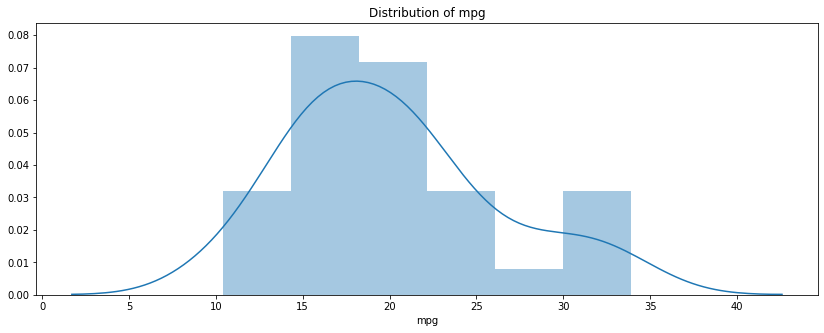

In [33]:
# visualizing the distribution of target varriable(house prices)
target = df.mpg
print("Distribution Of Sales Price FIG.1")
plt.figure(figsize=(14, 5))
sns.distplot(target)
plt.title('Distribution of mpg')
plt.show()

Distribution of ALL Numerical Features   FIG 2


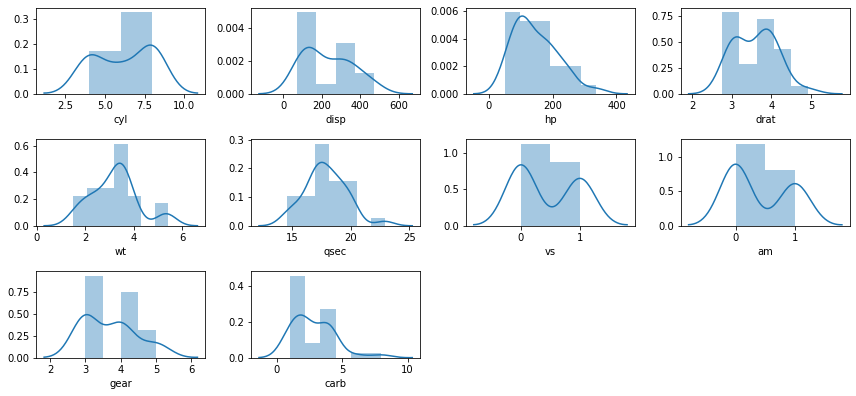

In [34]:
#Distributions of attributes
num_attributes = df.select_dtypes(exclude='object').drop('mpg', axis=1).copy()

print("Distribution of ALL Numerical Features"," ","FIG 2")
fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(10,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

FIG 4. Scatter Plot


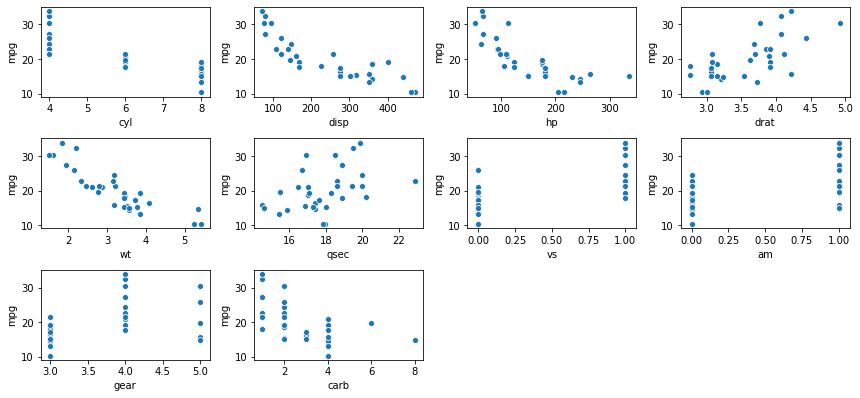

In [35]:
print("FIG 4. Scatter Plot")
f = plt.figure(figsize=(12,18))

for i in range(len(num_attributes.columns)):
    f.add_subplot(10,4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

In [0]:
# get the correlation coefficients between these features.
num_corr =df[num_cols].corr()

Fig 3 


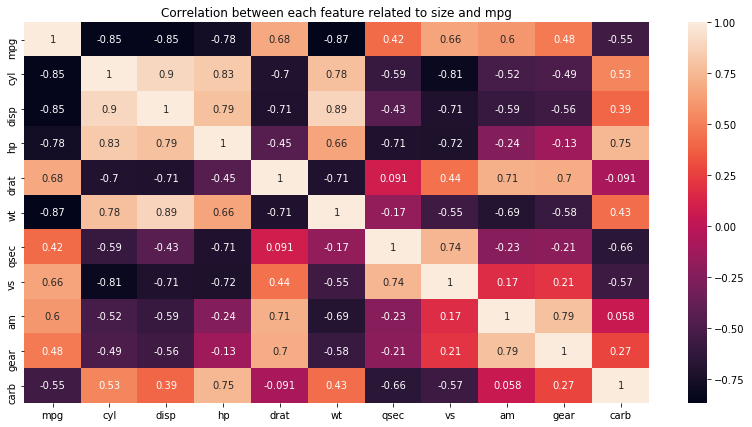

In [37]:
# Set the width and height of the figure
print("Fig 3 ")
plt.figure(figsize=(14,7))

# Add title
plt.title("Correlation between each feature related to size and mpg")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=num_corr, annot=True)

In [38]:
#Sort correlation with sale price in order and display
num_corr.sort_values(['mpg'], ascending=False, inplace=True)
print(num_corr.mpg)

mpg     1.000000
drat    0.681172
vs      0.664039
am      0.599832
gear    0.480285
qsec    0.418684
carb   -0.550925
hp     -0.776168
disp   -0.847551
cyl    -0.852162
wt     -0.867659
Name: mpg, dtype: float64


In [0]:
from sklearn.model_selection import train_test_split

# split the dataset into features available for prediction (X) and value to predict (y)
y = df['mpg'].values
X = df.drop('mpg', 1).values
feature_names = df.drop('mpg', 1).columns

# save 30% of the records for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)
X_train.shape

(9, 10)

As you can see from the description above, the number of predictive features available in this dataset (10) is comparable to the number of records (22). Such conditions tend to produce overfitted models that give exceptional predictions on their own training data, but poor predictions on the withheld test data. We will see an example of an overfitted model below.



In [0]:
#The following lines of code fit a linear model (without regularization) using all of the original features:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
import pandas as pd
from sklearn.metrics import r2_score

# print R^2 for the training set
print('The R-squared value for the training set is: {:0.4f}'.format(r2_score(y_train, lm.predict(X_train))))

# print intercept and coefficients
param_df = pd.DataFrame({"Coefficient": [lm.intercept_] + list(lm.coef_),
                         "Feature": ['intercept'] + list(feature_names)})
param_df[['Feature', 'Coefficient']]


The R-squared value for the training set is: 1.0000


,Feature,Coefficient
0,intercept,-96.037501
1,cyl,-5.777114
2,disp,0.183642
3,hp,-0.245128
4,drat,20.683140
5,wt,6.713631
6,qsec,5.128808
7,vs,-12.882279
8,am,34.980730
9,gear,-19.251219


Notice that the model performs very well on the training data to which it was fitted. (Predictions of the model account for 89% of the variance in mpg values.) Some of the feature coefficients may reflect our intuition: for example, heavy cars tend to have worse gas mileage ($\beta_{\textrm{wt}} = -5.0$), and cars with manual transmissions tend to have better gas mileage ($\beta_{\textrm{am}} = 5.2$).



In [0]:
import numpy as np

predicted = lm.predict(X_test)

r_squared = r2_score(y_test, predicted)
mae = np.mean(abs(predicted - y_test))
rmse = np.sqrt(np.mean((predicted - y_test)**2))
rae = np.mean(abs(predicted - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((predicted - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

# Create a data frame for storing results from each model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                   'Relative Absolute Error', 'Relative Squared Error'])
summary_df['Linear Regression, all variables'] = [r_squared, mae, rmse, rae, rse]
summary_df

,"Linear Regression, all variables"
R-squared,-15.887973
Mean Absolute Error,15.632566
Root Mean Squared Error,22.142005
Relative Absolute Error,3.630851
Relative Squared Error,16.887973


Notice that the R-squared value for true vs. predicted mpg of the test set is much lower than it was for the training set. (Granted, our test set is not very large, so some fluctuation is expected.) This is indicative of model overfitting.